

**Card Fraud Detection ML Project:** 

This project utilizes Logistic Regression to train a model on a credit card transaction dataset. Its main goal is to predict the likelihood of future transactions being fraudulent and assess the impact of certain factors on this probability.




**Implementation process:**

__Step 1:__ Import necessary package and set up environment 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

C:\Users\Admin\AppData\Local\Temp\ipykernel_13252\2796158965.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


__Step 2:__ Import dataset and grab overall sight of the data

In [2]:
#read csv file and see head of the dataframe

data = pd.read_csv('creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
#See the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
#see the distribution of fraud and non fraud transaction
# 0 is not 1 is fraud

data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [5]:
#split data 

fraud = data[data.Class == 1]
normal = data[data.Class == 0]

In [6]:
#see the describe for the amount of transactions

fraud.Amount.describe()


count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [7]:

normal.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

**Step 3:** Preprocessing data to modelling

In [8]:
#Define feature and target

X = data.drop(axis=1, columns= ['Class', 'id'])
Y = data['Class']

In [9]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [10]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [11]:
#Split dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

print(X_train.shape, X_test.shape)

(398041, 29) (170589, 29)


**Step 4:** Training model using logistic regression and training set

In [12]:
from sklearn.preprocessing import StandardScaler

#Scaler need to be imported as the data of the features need to be scaled, otherwise the logistic function will not converge in this case

In [13]:
#scale the data to standardize the features, mean = 0 and var = 1, help the function converge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
train_model = LogisticRegression(max_iter = 1000)

train_model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

**Step 5:** Model evaluation using test set

In [15]:
#score accuracy on training data

X_train_predict = train_model.predict(X_train_scaled)
training_accuracy = accuracy_score(X_train_predict, Y_train)

print(X_train_predict)
print(Y_train.values)

print('Training set accuracy: ', training_accuracy)

report_training = classification_report(Y_train, X_train_predict)
print('Detailed performance: \n', report_training)


[1 0 1 ... 0 0 0]
[1 0 1 ... 0 0 0]
Training set accuracy:  0.9650588758444482
Detailed performance: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97    199020
           1       0.98      0.95      0.96    199021

    accuracy                           0.97    398041
   macro avg       0.97      0.97      0.97    398041
weighted avg       0.97      0.97      0.97    398041



In [16]:
#score accuracy on test data

X_test_predict = train_model.predict(X_test_scaled)
test_accuracy = accuracy_score(X_test_predict, Y_test)

print(X_test_predict)
print(Y_test.values)

print('Test set accuracy: ', test_accuracy)

report_test = classification_report(Y_test, X_test_predict)
print('Detailed performance: \n',report_test)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
Test set accuracy:  0.9646929168938209
Detailed performance: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     85295
           1       0.98      0.95      0.96     85294

    accuracy                           0.96    170589
   macro avg       0.97      0.96      0.96    170589
weighted avg       0.97      0.96      0.96    170589



**Step 6:** Analyze the impact of each feature on the probability of fraud and the coefficients corresponding to each feature

In [34]:
coefficients = train_model.coef_[0]
feature_names = X.columns

#store feature names and coefficient in dataframe

coef_df = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients})

#absolute value of the coefficients to see impact

coef_df['Abs Coefficient'] = abs(coef_df['Coefficients'])
coef_df = coef_df.sort_values(by = 'Abs Coefficient', ascending=False)

In [22]:
import matplotlib.pyplot as plt

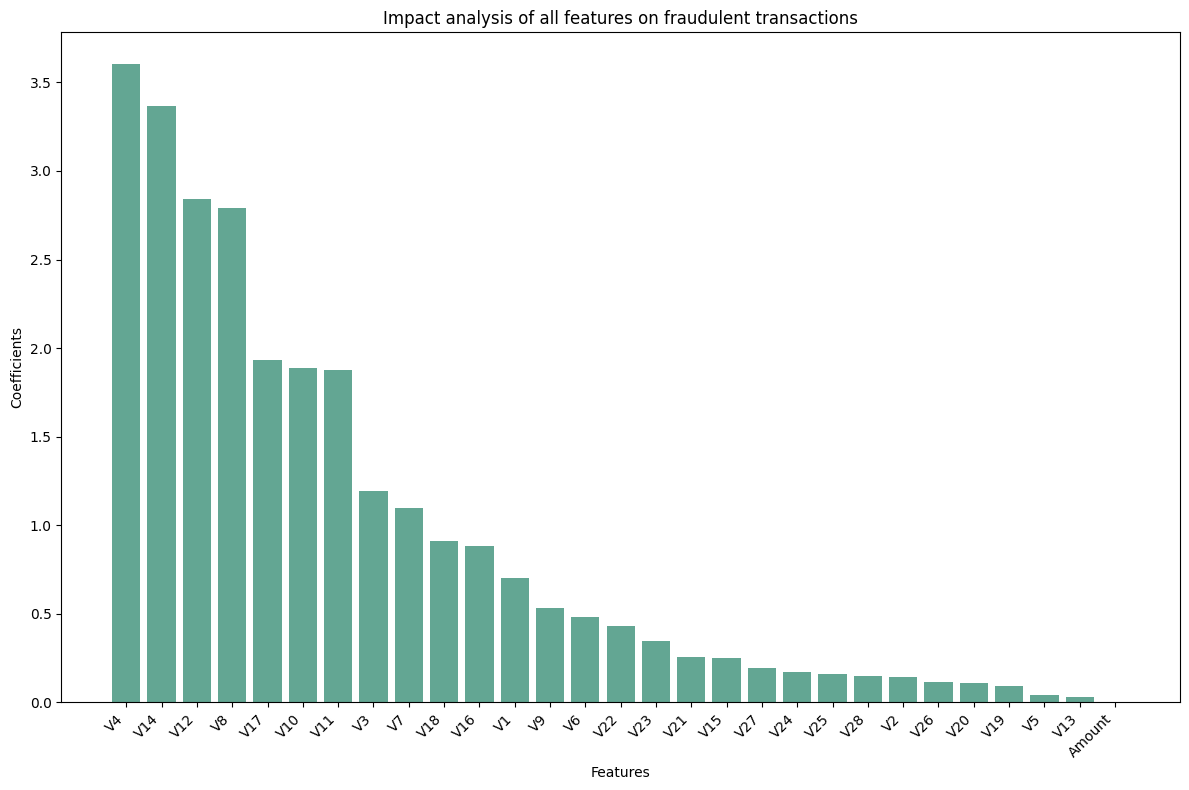

In [33]:
#Visual the impact of each feature

all_features  = coef_df['Features']
feature_coef = coef_df['Abs Coefficient']

plt.figure(figsize=(12,8))
plt.bar(all_features, feature_coef, color = '#63A693', width = 0.8)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Impact analysis of all features on fraudulent transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
#Print top 10 most impactful features

print('Top 10 most impactful features and their coefficients: ')
print(coef_df.head(10))

Top 10 most impactful features and their coefficients: 
   Features  Coefficients  Abs Coefficient
3        V4      3.602671         3.602671
13      V14     -3.369322         3.369322
11      V12     -2.843380         2.843380
7        V8     -2.789266         2.789266
16      V17     -1.935344         1.935344
9       V10     -1.886539         1.886539
10      V11      1.874372         1.874372
2        V3     -1.193870         1.193870
6        V7     -1.095407         1.095407
17      V18     -0.913137         0.913137
